In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [ ]:
file_path = "/AmazonSaleReport.csv"
data = pd.read_csv(file_path)

<ipython-input-65-73e444d541f5>:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [ ]:
data = data.dropna()
print(data.head())

       index             Order ID      Date                        Status  \
49051  49051  408-4858463-2356347  05-31-22  Shipped - Delivered to Buyer   
49077  49077  402-7697834-2682766  05-31-22  Shipped - Delivered to Buyer   
49081  49081  402-7031777-0396341  05-31-22  Shipped - Delivered to Buyer   
49082  49082  408-1235521-4337163  05-31-22  Shipped - Delivered to Buyer   
49083  49083  403-3845187-4421165  05-31-22  Shipped - Delivered to Buyer   

      Fulfilment Sales Channel  ship-service-level    Style             SKU  \
49051   Merchant      Amazon.in           Standard    J0385      J0385-KR-M   
49077   Merchant      Amazon.in           Standard  JNE3654  JNE3654-TP-XXL   
49081   Merchant      Amazon.in           Standard  JNE3798   JNE3798-KR-XS   
49082   Merchant      Amazon.in           Standard    J0152      J0152-DR-L   
49083   Merchant      Amazon.in           Standard    J0157     J0157-DR-XL   

            Category  ... currency Amount         ship-city   

In [ ]:
features = ['Qty', 'Amount']

In [ ]:
data = data.dropna(subset=['Amount'])

In [ ]:
df = data[features]

In [ ]:
# Handle outliers using Z-score
z_scores = df.apply(zscore)
df = df[(z_scores < 3).all(axis=1)]

In [ ]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
## Clustering

from sklearn.cluster import KMeans

In [ ]:
# Apply K-Means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data[['Qty', 'Amount']])

In [ ]:
data['Cluster'] = clusters

In [ ]:
## Feature Engineering (Placeholder)

def feature_engineering(data):
    """Performs feature engineering if needed."""
    return data

data = feature_engineering(data)

In [ ]:
## Visualization

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
floats, objects = [], []
for col in df.columns:
    if df[col].dtype == object:
        objects.append(col)
    elif df[col].dtype == float:
        floats.append(col)

print(objects)
print(floats)


[]
['Amount']


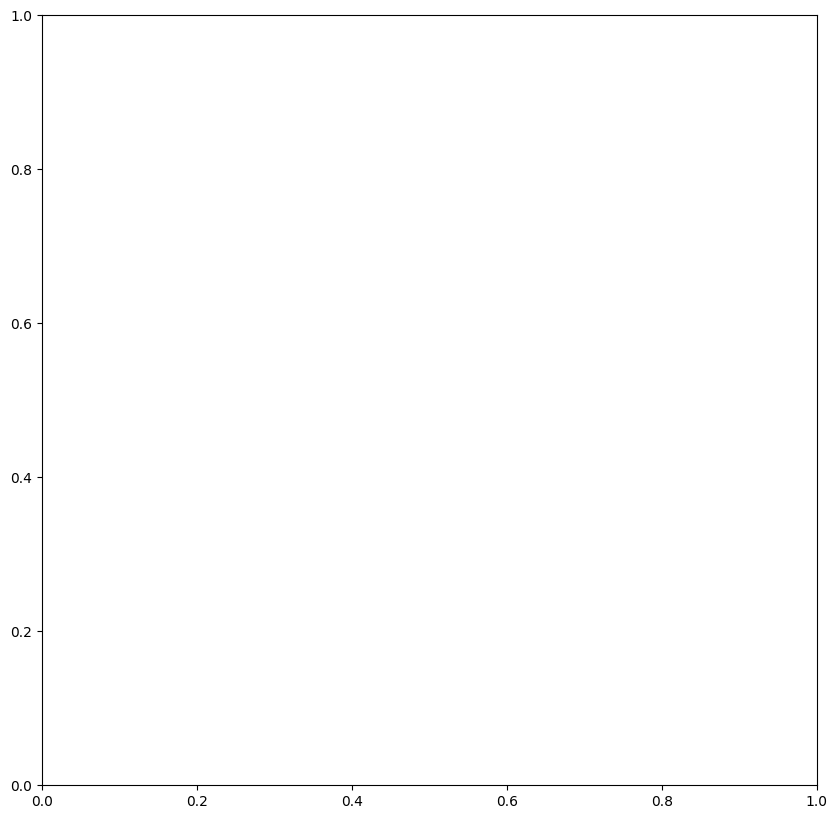

In [ ]:
plt.subplots(figsize=(10, 10))
for i, col in enumerate(objects):
    plt.subplot(2, 2, i + 1)
    sb.countplot(df[col])
plt.show()

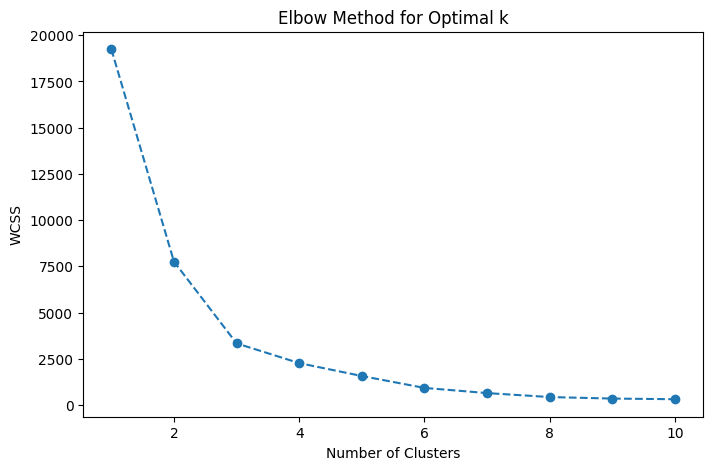

In [ ]:
# Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

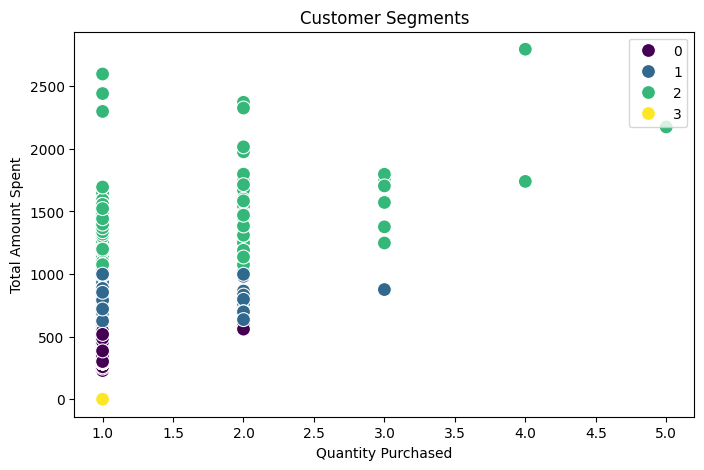

In [ ]:
# Visualizing Customer Segments
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Qty'], y=data['Amount'],
                hue=data['Cluster'], palette='viridis', s=100)
plt.xlabel('Quantity Purchased')
plt.ylabel('Total Amount Spent')
plt.title('Customer Segments')
plt.legend()
plt.show()

In [ ]:
# Save clustered data
data.to_csv("/content/sample_data.csv", index=False) # Changed file path to include '.csv' extension